In [1]:
import pandas as pd
import numpy as np
#from pandas import ExcelWriter
#from pandas import ExcelFile
#from scipy import stats
import matplotlib.pyplot as plt
import math
import xlwt
import openpyxl
from matplotlib.font_manager import FontProperties

#parses through txt file. Finds chromatogram data and returns a plot
def GCgraph (filename):
    
    #nested function to convert filename list to string
    def fileListToString(filename):
        str1 = ""
        iter = 0
        for file in range(len(filename)-1):
            name = filename[file]
            str1 = str1 + name[0:name.index(".")] + ', '
            iter = iter + 1
        last = filename[iter]
        str1 = str1 + last[0:last.index(".")]
        return str1
    
    #if only one file, cast to a list type for the loop to work
    if not isinstance(filename, list):
        filename = [filename]
        
    #Master lists holding all RT and Intensity data    
    RTimeMaster = []
    IntensityMaster = []
    
    #for every file, get data and add to the Master lists
    for file in filename:
        lookup = '[Chromatogram (Ch1)]'
        start = findPosition(file, '[Chromatogram (Ch1)]')
        end = findPosition(file, '[Chromatogram Additional (Ch1)]')
        rawData = open(file).readlines()

        RTime = []
        Intensity = []

        for i in range(len(rawData)):
            if i >= start + 5 and i <= end - 3:
                clean = rawData[i].strip().split('\t')
                RTime.append(clean[0])
                Intensity.append(clean[1])
                
        RTimeMaster.append(RTime)
        IntensityMaster.append(Intensity)
    
    #plot the data
    %matplotlib inline
    for p in range(len(RTimeMaster)):
        name = filename[p]
        plt.plot(RTimeMaster[p], IntensityMaster[p], label = name[0:name.index(".")])
    
    #formatting
    font = FontProperties()
    font.set_name('Arial')
    plt.gcf().set_facecolor('white')
    plt.xlim(1,16)
    plt.ylim(100,120000)
    plt.xlabel("min", fontproperties = font, fontsize = 12)
    plt.ylabel("intensity", fontproperties = font, fontsize = 12)
    plt.title("GC Data: " + fileListToString(filename), fontproperties = font, fontsize = 14)
    if len(filename) > 1:
        plt.legend()

#finds line position of lookup in filename
def findPosition (filename, lookup):
    dataFile = open(filename, "r")
    position = 0
    dataAsNumberedList = enumerate(dataFile, 1)
    for num, line in dataAsNumberedList:
        if lookup in line:
            position = num
    return position

#call GCgraph w/ txt filename
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

In [ ]:
GCgraph(['Rec-1.TXT','WT-1.TXT'])

In [ ]:
GCgraph(['trc-1.TXT'])

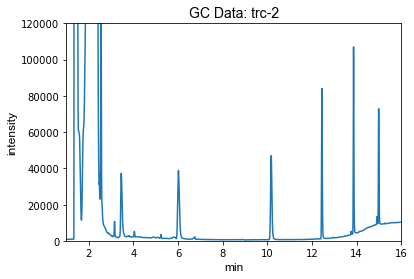

In [158]:
GCgraph('trc-2.TXT')

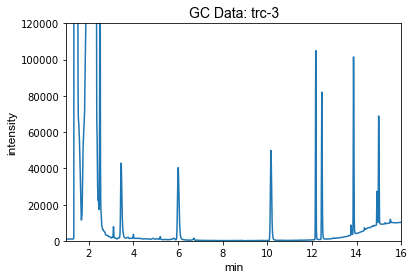

In [75]:
GCgraph('trc-3.TXT')

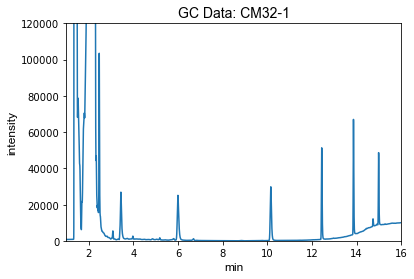

In [76]:
GCgraph('CM32-1.TXT')

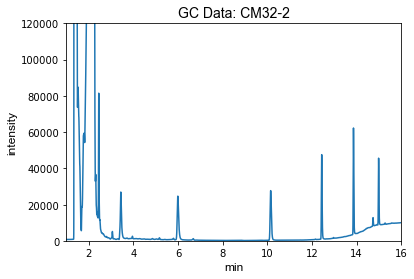

In [77]:
GCgraph('CM32-2.TXT')

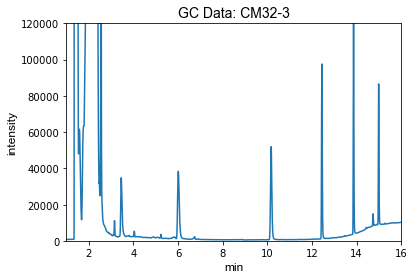

In [78]:
GCgraph('CM32-3.TXT')

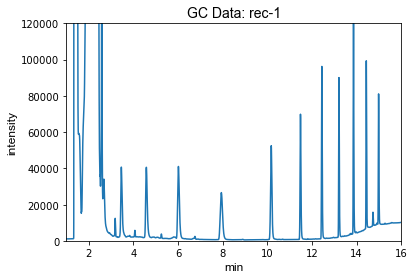

In [79]:
GCgraph('rec-1.TXT')

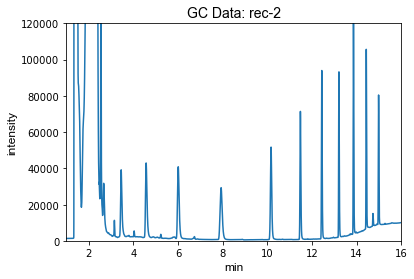

In [80]:
GCgraph('rec-2.TXT')

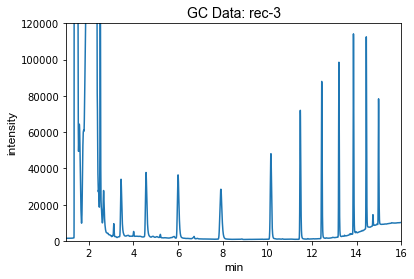

In [81]:
GCgraph('rec-3.TXT')

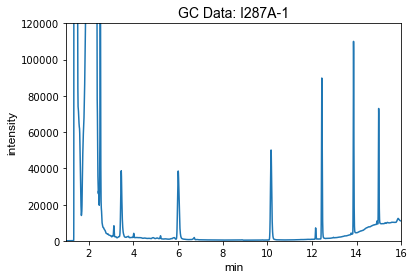

In [82]:
GCgraph('I287A-1.TXT')

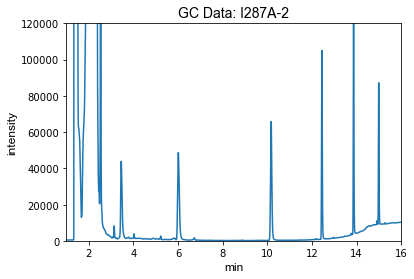

In [83]:
GCgraph('I287A-2.TXT')

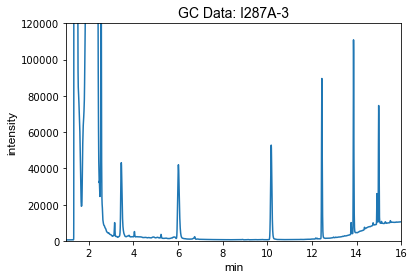

In [84]:
GCgraph('I287A-3.TXT')

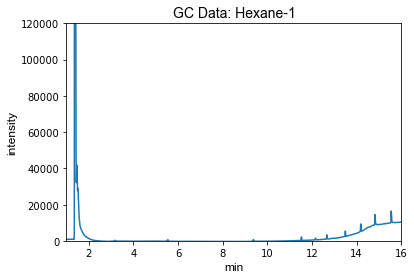

In [85]:
GCgraph('Hexane-1.TXT')

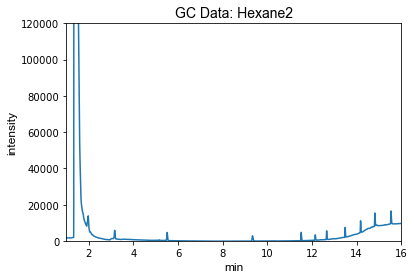

In [86]:
GCgraph('Hexane2.TXT')

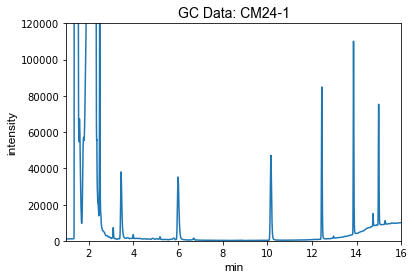

In [87]:
GCgraph('CM24-1.TXT')

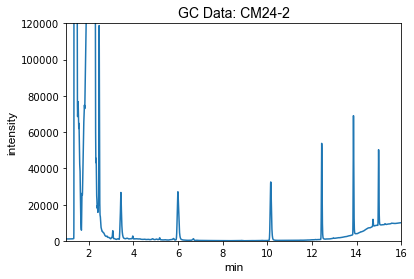

In [88]:
GCgraph('CM24-2.TXT')

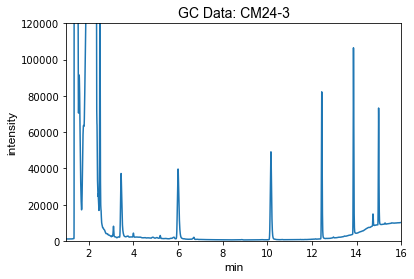

In [89]:
GCgraph('CM24-3.TXT')

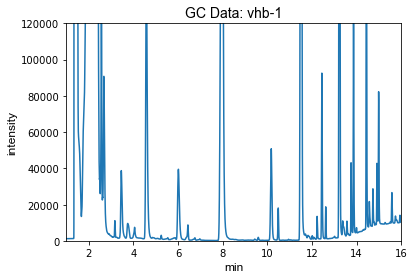

In [90]:
GCgraph('vhb-1.TXT')

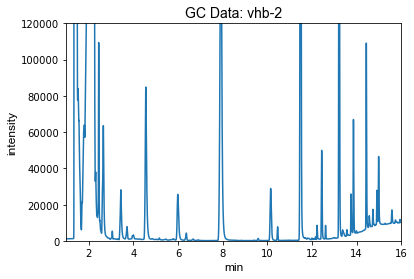

In [91]:
GCgraph('vhb-2.TXT')

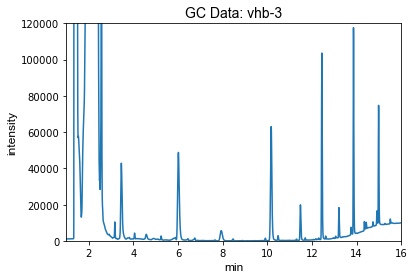

In [92]:
GCgraph('vhb-3.TXT')